##TITANIC SURVIVAL PREDICTION


We will be applying logistic regression for titanic survival prediction, and find it's accuracy. We will be first taking the 'titanic_train.csv' dataset, plot that data in graphs. Then, we will use the logistic regression model and find it's accuracy.

#Importing Libraries:

We will be importing some libraries useful for our prediction and data plotting.

##Data:
Let's get the titanic data from the titanic_train.csv using pandas

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
train = pd.read_csv('train.csv')

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Data analysis:

Let's do exploratory data analysis. We will now start with checking the missing data. 

In [66]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


To check where the missing values are in, we can create a heatmap using seaborn.

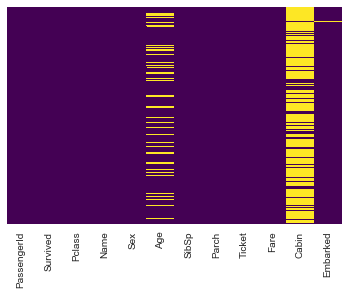

In [67]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here, around 20% of age data is missing. Here, the proportion of the age data missing is small enough to be replaced with some form of imputation. But, in the cabin column, a lot of data is missing, which cannot be replaced with any form of imputation. So, we will delete this column.


Now, we will be visualizing some more data using seaborn. We will create a counter plot based on the survived column, i.e., how many people survived. From the given dataset, if the value in survived column is 0, means that person did not survive. If that value is 1, means that person survived.

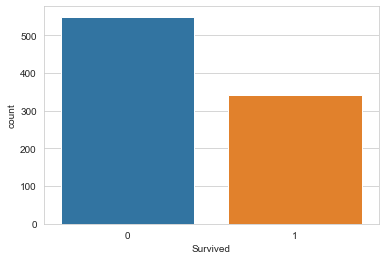

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

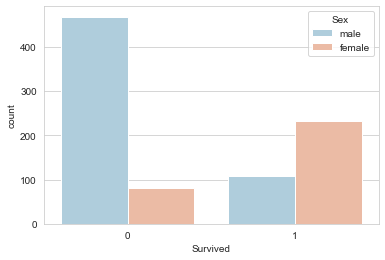

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

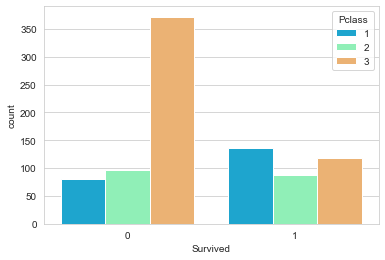

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

Checking the distribution of age, using distplot. Here, we are dropping the null(NaN) values.

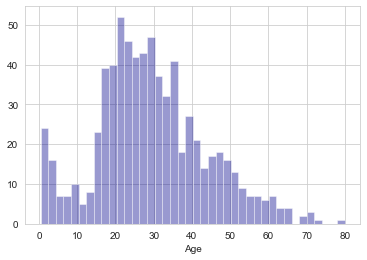

In [71]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkblue',bins=40)

Now, plotting the countplot of siblings and spouse(Siblings+spouse).Written as SibSp in the code.

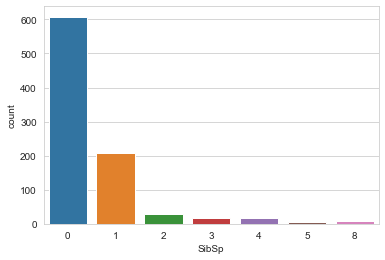

In [72]:
sns.countplot(x='SibSp',data=train)

Checking the ship's fares, and plotting them.

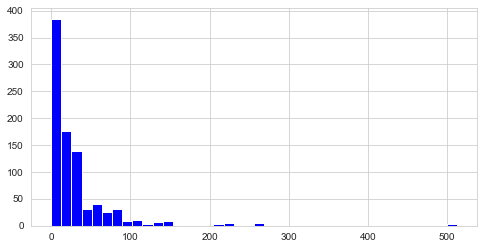

In [73]:
train['Fare'].hist(color='blue',bins=40,figsize=(8,4))

##Removing the null values:

In the age column, as the number of null values are less, we can take the mean age of all the passengers(imputation), and add those values in the place of null values. For, that, we will first find out the mean age of all the passengers using box plot.

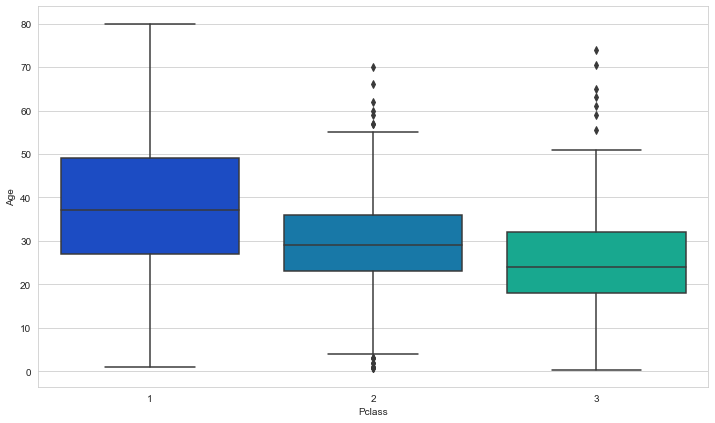

In [74]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

From the above box plot, we can see that most of the passengers in class1 are having age near 35-40, similarly for class2, at 27-30, and at around 24 for class3(mean age). So, from that box plot,we will take 37, for class1, 29 for class2, and 24 for class3. Now, we will be writing a function to fill the NaN values in the age column, with the mean value of that respective passenger class.

In [75]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now, applying this function.

In [76]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

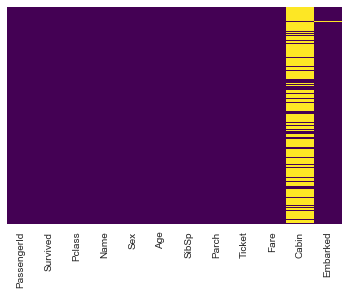

In [77]:
#checking with the heatmap to ensure all NaN values in age column are replaced
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The NaN values in the age column are removed. Now, we have most of the NaN values in the Cabin column. Since, there are so many NaN values in the Cabin colum and also the cabin column values are not so important for survival prediction, we drop that column. 

In [78]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
#Checking the first 5 rows of the data, if the cabin column is dropped

In [79]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [80]:
train.dropna(inplace=True)

##Converting categorical features.
Here,we have Sex and Embarked, which has categories. Sex has 2 categories and Embarked has 3 categories. We will handle these categorical features with pandas using the inbuilt function get_dummies()

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [82]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [83]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [84]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

Removing those columns as they are not required. Removing Sex and Embarked columns also as we had converted them to categorical features.

In [85]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Now, we need to append sex column and embark column, as they are the categorical features. For that, we use the method concat.

In [86]:
train = pd.concat([train,sex,embark],axis=1)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now, our data is ready. From this data,we have to divide the data into dependent and independent features. Here, the survived column is our dependent feature, whereas the other columns are independent features.

##Applying a Logistic Regression Model

##Train Test Split

Now, we will be splitting our data into a training set and test set. Here, we are creating a train data and dropping the survived column, as it is a dependent feature.

In [88]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


This is the complete training data set, and below is the output data set.

In [89]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

So, considering these two data, we are going to do the train test split. For this, we will be using sklearn.model_selection

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.30,random_state=101)

Here, we are taking test size: 0.30. Now, we will be importing Logistic regression model, for training and prediction.

##Training and Predicting

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ramdh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
predictions = logmodel.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
accuracy=confusion_matrix(y_test,predictions)

In [97]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

 Here, we got the accuracy as 0.82. So, we have an accuracy of 82%.